# Problem sheet 3 - Q4: k-means clustering

1. [Implementation](#1)
2. [Next steps](#2)

In this question we simply want to implement the $k$-means clustering algorithm. We begin by generating random clusters of data with `sklearn.datasets.make_blobs`.

## 1. Implementation<a id="1"></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from matplotlib import animation, rc
from IPython.display import HTML

X = make_blobs(5000, n_features=2, centers=4, random_state=1)[0]

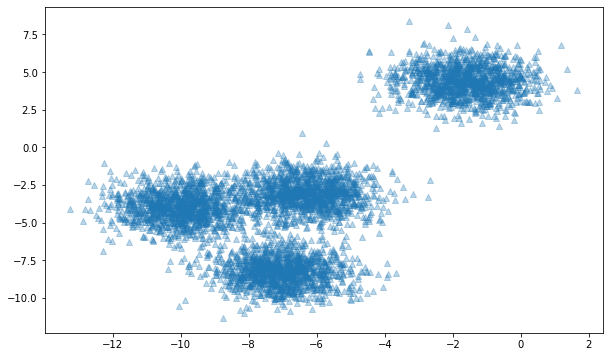

In [2]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0].ravel(), X[:, 1].ravel(), alpha=0.3, marker='^')
plt.show()

Suppose we have our dataset $\{x^{(i)}\}$ and for each $x^{(i)}$ we want to assign a label (or _colour_) $y^{(i)}=1,\ldots, k$.
The $k$-means algorithm does this by considering a set of centroids $\{c_{i}\}_{i=1}^{k}$, where $k$ is the number of clusters we want to fit, and by assigning $x^{(i)}$ to the same cluster as its nearest centroid. To find optimal clusters, we first initialise each centroid by randomly sampling from the dataset. The algorithm then proceeds by repeating the following steps until convergence (which is guaranteed almost-always, but not necessarily to the global optimum):
1. Alter the label for each point according to their nearest centroid: $$y^{(i)}:=\mathop{\mathrm{argmin}}_{j=1,\ldots,k}|x^{(i)}-c_{j}|,$$
2. Update the centroids to be the means of the new clusters:
$$c_{j}:=\frac{1}{|\{x^{(i)}:y^{(i)}=j\}|}\sum_{x^{(i)}:y^{(i)}=j}x^{(i)}.$$

In [3]:
def kmeans(X, k=3, seed=None):
    rng = np.random.default_rng(seed)
    centroids = X[rng.choice(np.arange(len(X)), k),:]
    
    distances = np.zeros((X.shape[0], k))
    colors = np.zeros(X.shape[0])
    
    changed_colors = len(X)
    iters = 0
    
    colors_history = []
    centroids_history = []
    
    while changed_colors > 0:
        iters += 1
        colors_old = colors.copy()
        
        for i, c_i in enumerate(centroids):
            distances[:, i] = np.linalg.norm(X - c_i, axis=1)

        colors = np.argmin(distances, axis=1)
        changed_colors = np.sum(colors_old != colors)
        
        for i in range(k):
            centroids[i] = np.mean(X[colors == i, :], axis=0)
        
        colors_history.append(colors.copy())
        centroids_history.append(centroids.copy())
    
    print(f"Finished k-means with k={k} in {iters} iterations.")
    return colors_history, centroids_history

Let's now try to run our algorithm on the above data for $k=4$.

In [4]:
colors_history, centroids_history = kmeans(X, 4, seed=0)

Finished k-means with k=4 in 15 iterations.


We can visualise the four clusters and their centroids in the following way:

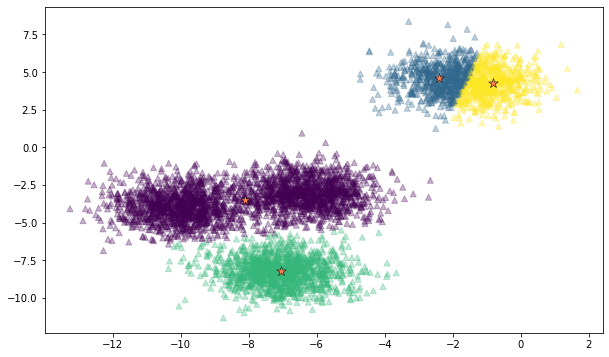

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0].ravel(), X[:, 1].ravel(), alpha=0.3, marker='^', c=[colors_history[-1]])
ax.scatter(centroids_history[-1][:,0], centroids_history[-1][:,1], marker='*', c='coral',
                   edgecolor='k', linewidths=0.5, s=100)
plt.show()

We see that the algorithm converges very quickly, but unfortunately it does not converge to (what we would think of) as the optimal solution (note if you rerun this notebook your result might vary). The $k$-means algorithm is known to have high variance. One way around this is to run the algorithm multiple times and choose the model which performs the best according to some metric (e.g. variance within the clusters, or how well separated the clusters are from each other). Anyway, we will not do that here, but we will just build a neat little visualiser to animate our training procedure.

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
plt.close()
scat = ax.scatter(X[:, 0].ravel(), X[:, 1].ravel(), alpha=0.3, marker='^', c=[])
scat2 = ax.scatter([], [], marker='*', c='coral',
                   edgecolor='k', linewidths=0.5, s=100)

def init():
    scat = ax.scatter(X[:, 0].ravel(), X[:, 1].ravel(), alpha=0.3, marker='^', c=[])
    return scat,
    
def animate(i):
    scat.set_array(colors_history[i])
    scat2.set_offsets(centroids_history[i])
    return scat, scat2,
    
anim = animation.FuncAnimation(fig, animate,
                               frames=range(len(colors_history)), interval=500,
                               blit=False)

In [7]:
# on OS X this requires ffmepg, if not available use HTML(anim.to_jshtml()) instead
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

Code for animation adapted from
https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

## 2. Next steps<a id="2"></a>

Here are a few ideas on what to do next:
- Include ways to compute some of the metrics mentioned above to measure the performance of our classifier.
- Our initialisation procedure is very simple, but there are more clever ones such as the $k$-means++ algorithm. Implement it.
- Another method to help us choose the appropriate $k$ is to consider so-called _elbow plots_, which simply display the value of one the aforementioned metrics versus different values of $k$. Include this feature in the functions for our evaluation metrics.